In [1]:
import pandas as pd

In [144]:
# データダウンロード
import pandas as pd
dataset = {
    train_test: pd.read_csv(
        f"../output/05__SentenceTransformer/{train_test}.csv"
    ).astype("float32") for train_test in ["train", "test"]
}

In [ ]:
# データ整形
target_col = "final_status"
X, y = dataset["train"].drop(target_col, axis="columns").copy(), dataset["train"][target_col].copy()

from sklearn.model_selection import train_test_split
seed = 42  # 乱数シード
X_cv, X_eval, y_cv, y_eval = train_test_split(
    X.values, y.values,
    test_size=0.25, random_state=42)

# 簡易的ダウンサンプリング
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
# 多数派クラスのサンプル数を100までダウンサンプリング
sampler = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_cv, y_cv = sampler.fit_resample(X_cv, y_cv)


/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


(36277, 133)

In [161]:
# スケーリング
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cv_scaled = scaler.fit_transform(X_cv)
X_eval_scaled = scaler.fit_transform(X_eval)


In [ ]:
from pytabkit import RealMLP_TD_Classifier
from sklearn.utils.class_weight import compute_sample_weight


# epochs は100くらいで頭打ち。隠れ層は512, 256, 128 まで複雑化したやつは試した
model = RealMLP_TD_Classifier(
    device='cpu',
    random_state=0,
    n_cv=1, n_refit=0,
    n_epochs=100,
    batch_size=512,
    hidden_sizes=[512, 512, 512],
    val_metric_name='1-auc_ovr',
    use_ls=True,
    lr=0.005,
    # lr_schedu=True,   # ★ Cosine Annealing を指定
    verbosity=2
)

model.fit(X_cv, y_cv)

/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Columns classified as continuous: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Columns classified as categorical: []


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Epoch 1/100: val 1-auc_ovr = 0.345469
Epoch 2/100: val 1-auc_ovr = 0.289507
Epoch 3/100: val 1-auc_ovr = 0.282382
Epoch 4/100: val 1-auc_ovr = 0.278784
Epoch 5/100: val 1-auc_ovr = 0.277304
Epoch 6/100: val 1-auc_ovr = 0.276004
Epoch 7/100: val 1-auc_ovr = 0.275928
Epoch 8/100: val 1-auc_ovr = 0.275353
Epoch 9/100: val 1-auc_ovr = 0.275970
Epoch 10/100: val 1-auc_ovr = 0.274494
Epoch 11/100: val 1-auc_ovr = 0.273986
Epoch 12/100: val 1-auc_ovr = 0.275170
Epoch 13/100: val 1-auc_ovr = 0.272018
Epoch 14/100: val 1-auc_ovr = 0.269657
Epoch 15/100: val 1-auc_ovr = 0.267435
Epoch 16/100: val 1-auc_ovr = 0.264590
Epoch 17/100: val 1-auc_ovr = 0.266034
Epoch 18/100: val 1-auc_ovr = 0.263133
Epoch 19/100: val 1-auc_ovr = 0.263128
Epoch 20/100: val 1-auc_ovr = 0.263042
Epoch 21/100: val 1-auc_ovr = 0.263016
Epoch 22/100: val 1-auc_ovr = 0.262873
Epoch 23/100: val 1-auc_ovr = 0.262623
Epoch 24/100: val 1-auc_ovr = 0.262442
Epoch 25/100: val 1-auc_ovr = 0.261852
Epoch 26/100: val 1-auc_ovr = 0.26

`Trainer.fit` stopped: `max_epochs=100` reached.


RealMLP_TD_Classifier(batch_size=512, device='cpu', hidden_sizes=[256, 128, 64],
                      lr=0.005, n_epochs=100, random_state=0, use_ls=True,
                      val_metric_name='1-auc_ovr', verbosity=2)

In [213]:
from sklearn.metrics import classification_report, f1_score

y_pred = model.predict(X_eval)
print(classification_report(
    y_eval, y_pred
))

print(f1_score(y_eval, y_pred))

/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.85      0.80     10301
           1       0.57      0.42      0.48      4837

    accuracy                           0.71     15138
   macro avg       0.66      0.63      0.64     15138
weighted avg       0.70      0.71      0.70     15138

0.4812566940378436


In [214]:
import numpy as np
from sklearn.metrics import f1_score
y_proba = model.predict_proba(X_eval)
thresh_list = np.linspace(0, 1, 201)

metrics_list = []
for thresh in thresh_list:
    y_pred_ = [1 if v > thresh else 0 for v in y_proba[:, 1] ]
    metrics_list.append(
        f1_score(y_eval, y_pred_)
    )

print(
    np.max(metrics_list),
    thresh_list[np.argmax(metrics_list)],
)

/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.5792236598890943 0.32


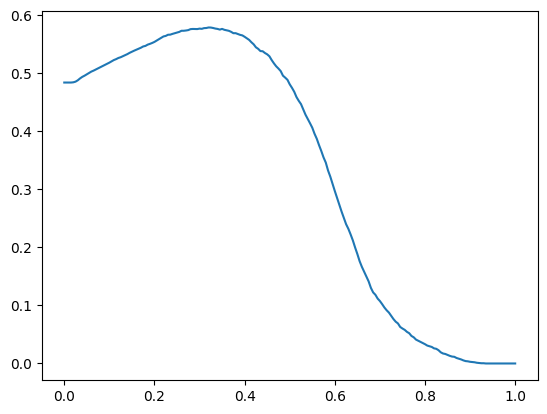

In [215]:
import matplotlib.pyplot as plt

plt.plot(thresh_list, metrics_list)

In [198]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# データ
target_col = "final_status"
X = dataset["train"].drop(target_col, axis="columns").astype("float32").copy().values
y = dataset["train"][target_col].astype(int).values

# 4:1 層化分割 → CV用 / 評価用
X_cv, X_eval, y_cv, y_eval = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# CV用データで層化5分割
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

eval_pred_probas = []  # 各foldのX_eval予測を保存

for fold, (train_idx, val_idx) in enumerate(skf.split(X_cv, y_cv)):
    print(f"===== Fold {fold+1} / 5 =====")

    # 分割
    X_tr, X_val = X_cv[train_idx], X_cv[val_idx]
    y_tr, y_val = y_cv[train_idx], y_cv[val_idx]

    # アンダーサンプリング（train のみ）
    sampler = RandomUnderSampler(random_state=42, sampling_strategy="auto")
    X_tr, y_tr = sampler.fit_resample(X_tr, y_tr)

    # スケーリング（train でfit → val/evalでtransform）
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_val = scaler.transform(X_val)
    X_eval_scaled = scaler.transform(X_eval)

    # モデル定義
    model = RealMLP_TD_Classifier(
        device='cpu',
        random_state=fold,
        n_cv=1, n_refit=0,
        n_epochs=50,
        batch_size=1024,
        hidden_sizes=[128] * 3,
        val_metric_name='1-auc_ovr',
        use_ls=True,
        lr=0.005,
        verbosity=0,
        use_early_stopping = True
    )

    # 学習
    model.fit(X_tr, y_tr)

    # 評価データ予測
    y_proba_eval = model.predict_proba(X_eval_scaled)
    eval_pred_probas.append(y_proba_eval)

# 5モデルの予測を平均（アンサンブル）
y_proba_eval_ensemble = np.mean(eval_pred_probas, axis=0)

# 最終予測ラベル
y_pred_eval = np.argmax(y_proba_eval_ensemble, axis=1)

# F1スコア
f1 = f1_score(y_eval, y_pred_eval)
print(f"Evaluation F1 Score: {f1:.4f}")


===== Fold 1 / 5 =====


/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/Users/henmi_note/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/henmi_note/Library/Python/3.9/lib/python/

TypeError: object of type 'NoneType' has no len()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# データ
target_col = "final_status"
X = dataset["train"].drop(target_col, axis="columns").astype("float32").copy().values
y = dataset["train"][target_col].astype(int).values
X_test = dataset["test"].drop(target_col, axis="columns").astype("float32").copy().values

# 層化5分割
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

test_pred_probas = []  # 各foldのテスト予測を保存
val_scores = []        # 各foldのバリデーションスコアを保存（必要なら）

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} / 5 =====")

    # 分割
    X_tr, X_val = X[train_idx], X[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    # アンダーサンプリング（train のみ）
    sampler = RandomUnderSampler(random_state=42, sampling_strategy="auto")
    X_tr, y_tr = sampler.fit_resample(X_tr, y_tr)

    # スケーリング（train でfit → val/testでtransform）
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_val = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # モデル定義
    model = RealMLP_TD_Classifier(
        device='cpu',
        random_state=fold,
        n_cv=1, n_refit=0,
        # n_epochs=50,
        n_epochs=10,
        batch_size=1024,
        hidden_sizes=[128] * 3,
        val_metric_name='1-auc_ovr',
        use_ls=True,
        lr=0.005,
        verbosity=2
    )

    # 学習
    model.fit(X_tr, y_tr)

    # テスト予測
    y_proba_test = model.predict_proba(X_test_scaled)
    test_pred_probas.append(y_proba_test)

# 5モデルの予測を平均（アンサンブル）
y_proba_test_ensemble = np.mean(test_pred_probas, axis=0)

# 最終予測ラベル
y_pred_test = np.argmax(y_proba_test_ensemble, axis=1)


In [199]:
sampler.fit_resample(
    X_cv
)

TypeError: fit_resample() missing 1 required positional argument: 'y'

In [187]:
y_pred_test
np.save(
    "../notes/tmp", y_pred_test
)